In [2]:
import numpy as np
from lib import alignment_algorithm

In [3]:
isort1=np.load('isort1.npy')
isort2=np.load('isort2.npy')    

In [4]:
sorted(isort1)
sorted(isort2)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [5]:
sorted(isort1)==sorted(isort2)

True

In [12]:
def alignment_algorithm(seq1, seq2, window_len=400):
    def hash_windows(seq, window_len):
        dct = {tuple(sorted(seq[i:i+window_len])): i for i in range(len(seq) - window_len + 1)}
        return dct
    seq1_hashes = hash_windows(seq1, window_len)
    print(seq1_hashes)
    N_matches=0
    N_windows=0
    for i in range(len(seq2) - window_len + 1):
        N_windows+=1
        window = sorted(seq2[i:i+window_len])
        print(window)
        if tuple(sorted(window)) in seq1_hashes:
            print('boom')
            N_matches+=1

    return N_matches/N_windows

alignment_algorithm(isort1, isort2, window_len=400)

{(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 19, 20, 21, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 53, 54, 55, 57, 58, 60, 61, 65, 66, 67, 68, 71, 72, 73, 75, 76, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 96, 98, 100, 101, 102, 105, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 123, 124, 125, 126, 127, 128, 130, 131, 132, 133, 135, 136, 137, 138, 139, 142, 143, 144, 145, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 164, 165, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 195, 196, 197, 198, 199, 202, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 233, 234, 235, 237, 239, 241, 244, 245, 246, 247, 248, 250, 252, 253, 254, 255, 256, 258, 260, 262, 264, 265, 266, 267, 268, 270, 271, 272, 273, 275, 276, 277, 278, 27

0.0

In [23]:

def alignment_algorithm(seq1, seq2, window_len=10):
    def intersection_over_union(window1, window2):
        intersection = len(set(window1) & set(window2))
        union = len(set(window1) | set(window2))
        return intersection / union
    
    def create_seq_windows(seq, window_len):
        # Create sliding windows of size window_len
        return [seq[i:i+window_len] for i in range(len(seq) - window_len + 1)]
    
    # Generate sliding windows for seq1
    seq1_windows = create_seq_windows(seq1, window_len)
    
    # For each window in seq2, compute the max IoU with any window in seq1
    max_list = []
    for s2_start in range(len(seq2) - window_len + 1):
        window2 = seq2[s2_start:s2_start + window_len]
        
        # Compute IoU for each window in seq1 with the current window in seq2
        iou_values = [intersection_over_union(window1, window2) for window1 in seq1_windows]
        
        # Append the max IoU for the current window in seq2
        max_list.append(max(iou_values))
    
    # Return the mean of the maximum IoU values
    return np.mean(max_list), max_list

_, max_list=alignment_algorithm(isort1, isort2, window_len=10)

In [16]:
isort1

array([150, 398, 399,  88, 118,  29, 199, 233, 363, 167, 370, 250,  54,
       159, 329, 436, 138,  20, 355,  11, 158, 317, 316, 285, 499, 396,
       322, 379, 417, 413, 108, 462, 278, 386,  73, 248, 416, 359, 442,
       423,  10, 393, 156, 172, 288, 358, 430, 403, 369, 229, 429, 450,
       192, 365, 446, 390, 420, 135, 388, 273, 376, 313, 324, 384, 339,
       397, 282, 427, 375, 125,  83,  53, 494,  89, 344, 244, 337,  19,
       323, 253,  33, 218, 268, 377, 308, 275, 432,  66,  65, 349, 476,
       237, 228, 334,  78,  58, 131,  42, 151,  61,  85,  35, 157, 472,
       354, 183, 457, 400, 491, 445, 298, 216, 209, 299, 353, 211, 190,
       424, 419, 173, 180, 447, 246, 226, 223, 213, 303, 459, 483, 195,
        44, 206, 489, 210,  86, 124, 490, 486, 208, 215,  82, 245, 198,
       350, 143, 304, 301, 495, 305, 309, 293, 148, 153,  75,  41, 455,
        81, 352,  43, 357, 361, 270, 212, 383,   0, 239, 487, 408, 497,
       205, 197, 332,   5, 219, 380, 415, 220, 176,  71,  34,  1

(array([ 21., 244., 154.,   0.,  57.,  15.,   0.,   2.,   0.,   2.]),
 array([0.05263158, 0.10121457, 0.14979757, 0.19838057, 0.24696356,
        0.29554656, 0.34412955, 0.39271255, 0.44129555, 0.48987854,
        0.53846154]),
 <BarContainer object of 10 artists>)

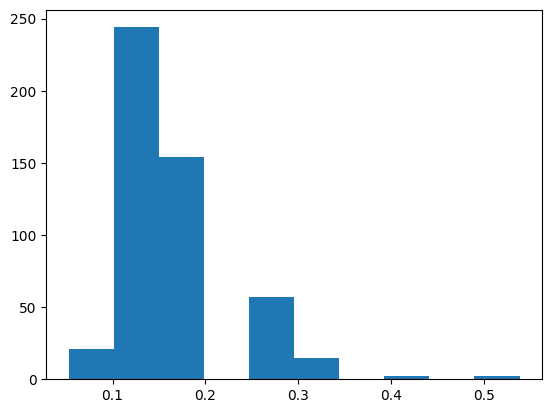

In [26]:
import matplotlib.pyplot as plt
plt.hist(max_list, bins=10)